In [10]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'CustomerID':[1,2,3,4,5,6,7,8,9,10],
    'Annual Income':[15,16,17,18,19,20,21,22,23,24],
    'Spending Score':[39,81,6,77,40,76,6,94,3,72]})
print(df)

   CustomerID  Annual Income  Spending Score
0           1             15              39
1           2             16              81
2           3             17               6
3           4             18              77
4           5             19              40
5           6             20              76
6           7             21               6
7           8             22              94
8           9             23               3
9          10             24              72


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      10 non-null     int64
 1   Annual Income   10 non-null     int64
 2   Spending Score  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


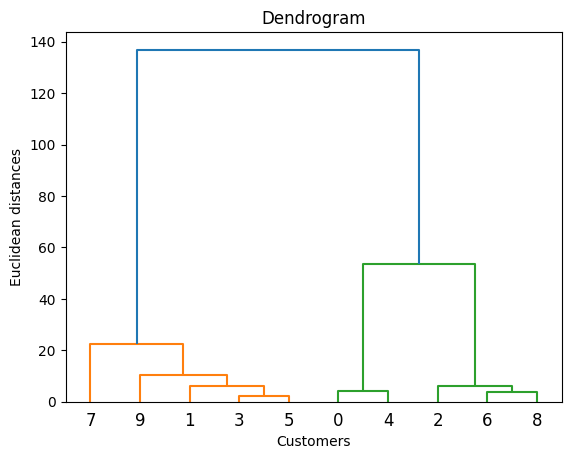

In [12]:
#Generate a dendrogram using scipy and matplotlib
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(df[['Annual Income','Spending Score']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df[['Annual Income','Spending Score']])
print(y_hc)

[2 0 1 0 2 0 1 0 1 0]


In [14]:
df['Cluster'] = y_hc
print(df)

   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0


In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df[['Annual Income','Spending Score']])
print(y_hc)

[2 0 1 0 2 0 1 0 1 0]


In [16]:
#the optimal number of clusters from the dendrogram is 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df[['Annual Income','Spending Score']])
print(y_hc)

[2 0 1 0 2 0 1 3 1 4]


In [17]:
#the final cluster assignments
df['Cluster'] = y_hc
print(df)

   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        3
8           9             23               3        1
9          10             24              72        4


In [18]:
for c in df['Cluster'].unique():
    group = df[df['Cluster'] == c]
    print(f"\nCluster {c} customers:")
    print(group[['CustomerID','Annual Income','Spending Score']])

# Show average values per cluster (centroids)
print("\nCluster summary (mean values):")
print(df.groupby('Cluster')[['Annual Income','Spending Score']].mean())


Cluster 2 customers:
   CustomerID  Annual Income  Spending Score
0           1             15              39
4           5             19              40

Cluster 0 customers:
   CustomerID  Annual Income  Spending Score
1           2             16              81
3           4             18              77
5           6             20              76

Cluster 1 customers:
   CustomerID  Annual Income  Spending Score
2           3             17               6
6           7             21               6
8           9             23               3

Cluster 3 customers:
   CustomerID  Annual Income  Spending Score
7           8             22              94

Cluster 4 customers:
   CustomerID  Annual Income  Spending Score
9          10             24              72

Cluster summary (mean values):
         Annual Income  Spending Score
Cluster                               
0            18.000000            78.0
1            20.333333             5.0
2            17.000000     